# Scenario Generation Using Python

Conejo et al. - 2010 - Decision Making Under Uncertainty in Electricity Markets (International Series in Operations Research & Management Science)
pp. 68

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from itertools import product
import warnings
from scipy.stats import weibull_min
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")


## Datasets

<img src="images/western_denmark_real_map.jpg" alt="Google Maps and Zone Map overlay" width="400"/>

The datasets were obtained from https://open-meteo.com/en/docs/historical-weather-api <br>
Time Zone: Europe/Berlin,CET <br>
Time Frame: 2023-07-03 T00:00:00	to 2024-01-31 T00:00:00

In [145]:
#Define the column names
column_names = ['Zone', 'Location', 'Coordinates', 'Elevation_Meters']

# Define the data for each column
data = {
    'Zone': list(range(1, 16)),  # Data for Zone
    'Location': ["Brønderslev", "Hanstholm", "Skive", "Hobro", "Hvide Sande", "Herning", "Silkeborg", "Aarhus", "Samsø", "Esbjerg", "Billund", "Middelfart", "Nyborg", "Rømø", "Aabenraa"],  # Data for Location
    'Coordinates': ["57.258347; 9.957447", "57.11775; 8.580508", "56.625656; 9.018789", "56.625656; 9.770355", "55.99297; 8.114755", "56.133568; 8.888888", "56.133568; 9.629629", "56.133568; 10.1851845", "55.85237; 10.653061", "55.43058; 8.709678", "55.711773; 9.146341", "55.500877; 9.818182", "55.28998; 10.662651", "55.149384; 8.46", "55.079086; 9.520959"],  # Data for Coordinates
    'Elevation_Meters': [26, 59, 12, 36, 3, 59, 86, 17, 13, 22, 67, 18, 5, 3, 48]  # Data for Elevation_Meters
}

# Create the DataFrame
locations_df = pd.DataFrame(data)

# Display the DataFrame
locations_df


Zone     Location            Coordinates  Elevation_Meters
0      1  Brønderslev    57.258347; 9.957447                26
1      2    Hanstholm     57.11775; 8.580508                59
2      3        Skive    56.625656; 9.018789                12
3      4        Hobro    56.625656; 9.770355                36
4      5  Hvide Sande     55.99297; 8.114755                 3
5      6      Herning    56.133568; 8.888888                59
6      7    Silkeborg    56.133568; 9.629629                86
7      8       Aarhus  56.133568; 10.1851845                17
8      9        Samsø    55.85237; 10.653061                13
9     10      Esbjerg     55.43058; 8.709678                22
10    11      Billund    55.711773; 9.146341                67
11    12   Middelfart    55.500877; 9.818182                18
12    13       Nyborg    55.28998; 10.662651                 5
13    14         Rømø        55.149384; 8.46                 3
14    15     Aabenraa    55.079086; 9.520959                48

In [81]:
# Initialize an empty dictionary to hold the DataFrames
zones = {}

for zone in range(1, 16):  # Adjusted to Python's 0-based indexing
    print(zone)  # This will print numbers from 1 to 15 in separate iterations.
    
    # Read the CSV file into a DataFrame
    # Make sure to adjust the path to your CSV files as necessary
    df = pd.read_csv(f"data/wind_speed_zone_{zone}.csv")
    
    # Rename columns
    df.rename(columns={'time': 'date_time', 'wind_speed_100m (km/h)': 'wind_speed_100m'}, inplace=True)
    
    # Remove rows with NaN values in the specified column
    df = df.dropna(subset=['wind_speed_100m'])

    # Transform 'time' to datetime and select as index 
    df['date_time'] = pd.to_datetime(df['date_time'])
    df.set_index('date_time', inplace=True)
    
    # Replace 0 in 'wind_speed_100m' column with 0.001
    df['wind_speed_100m'] = df['wind_speed_100m'].replace(0, 0.001)

    # Alternatively, to drop all rows with any NaN values (if needed)
    # df = df.dropna()
    
    # Store the DataFrame in the dictionary with a key like "data_zone_1"
    zones[f"data_zone_{zone}"] = df

# The zones dictionary now contains all the dataframes.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


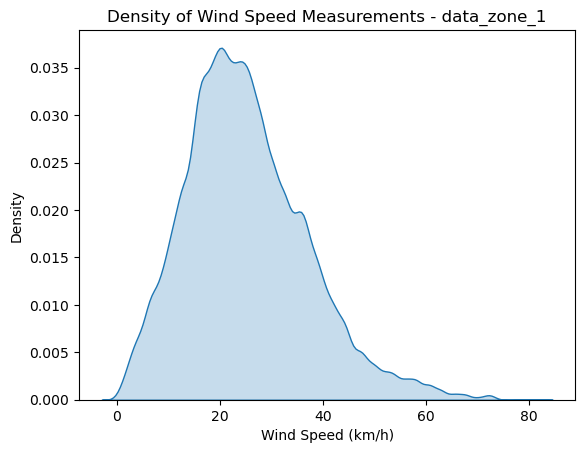

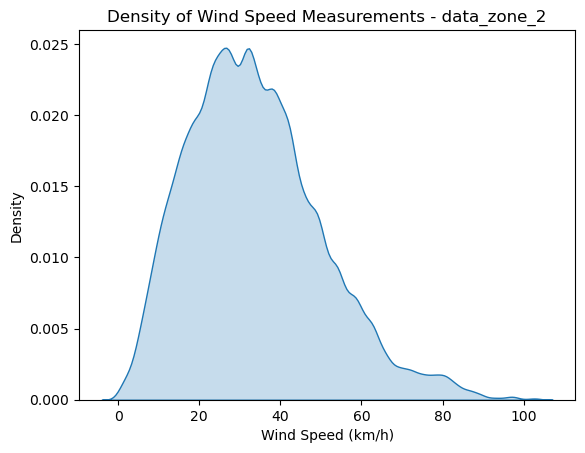

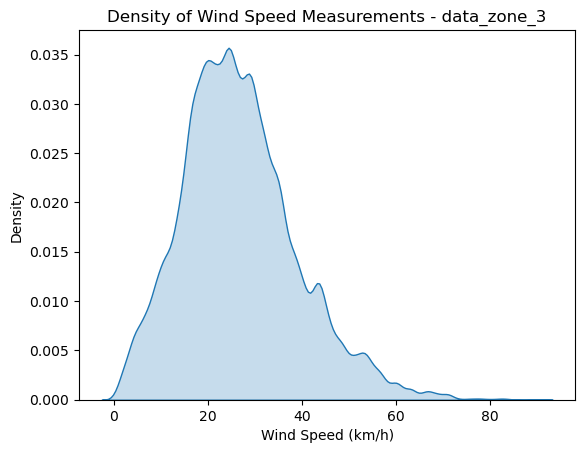

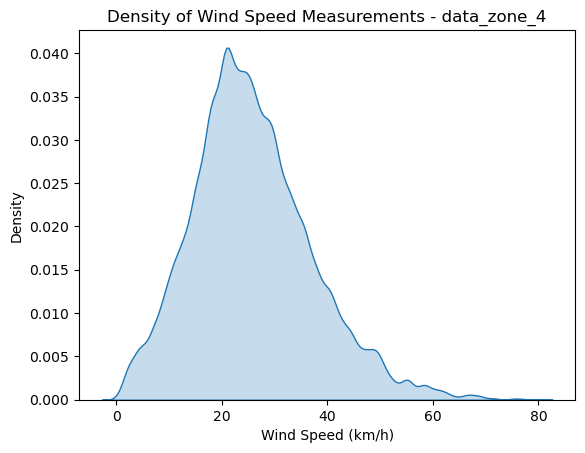

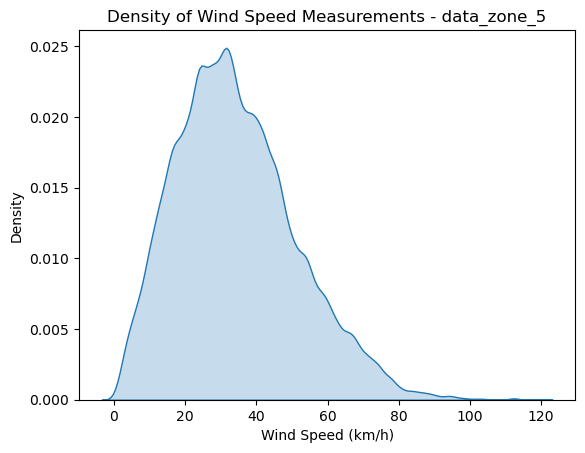

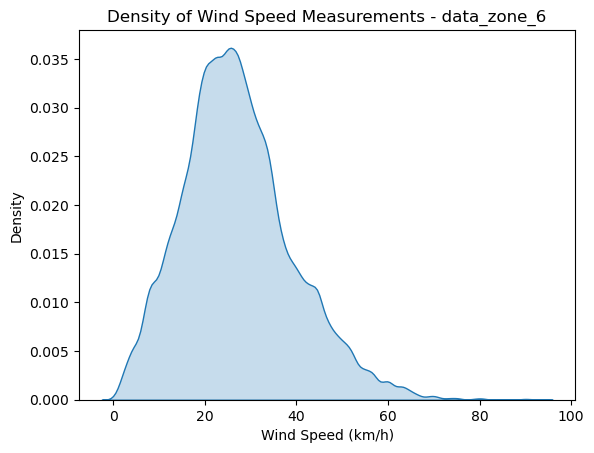

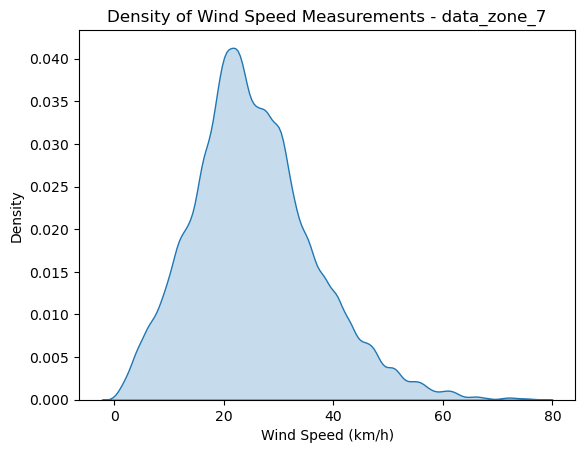

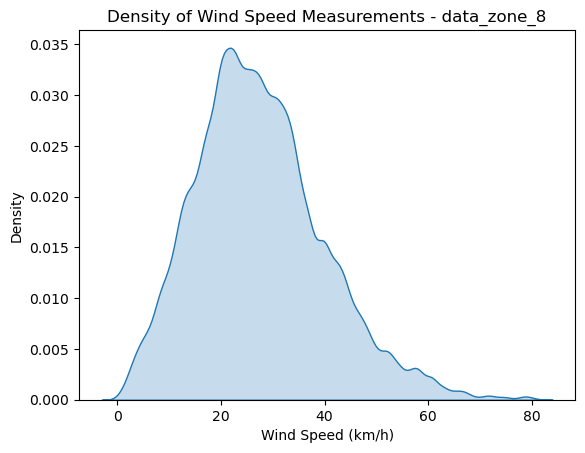

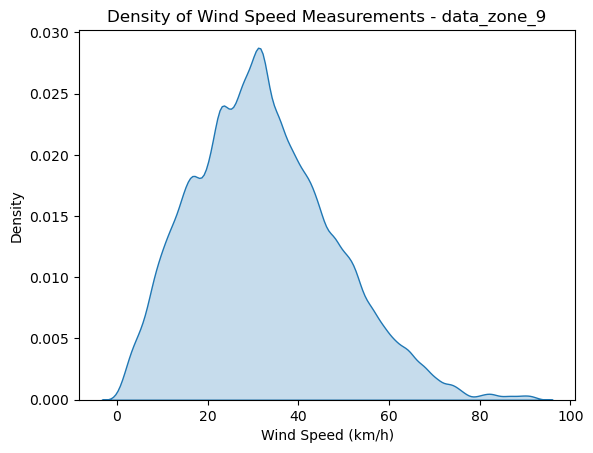

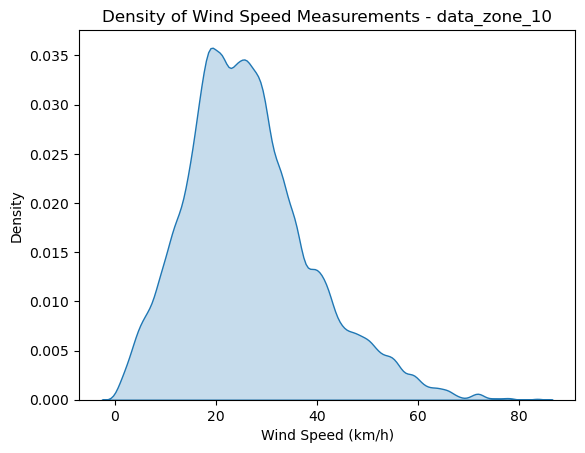

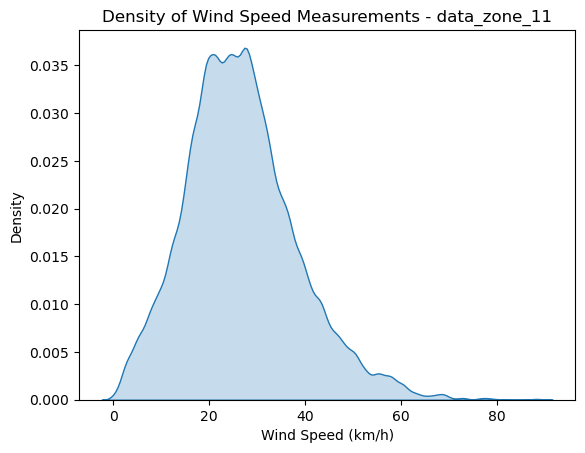

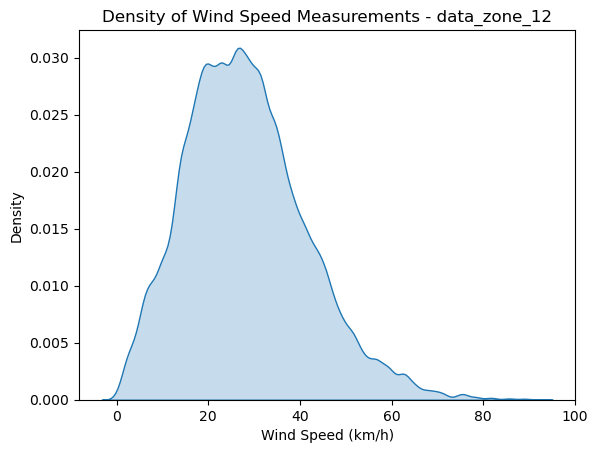

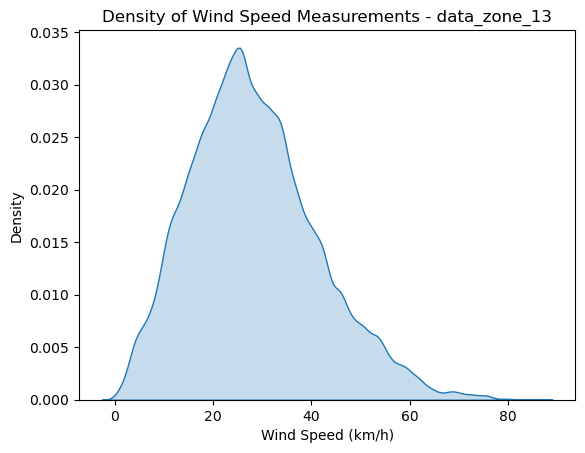

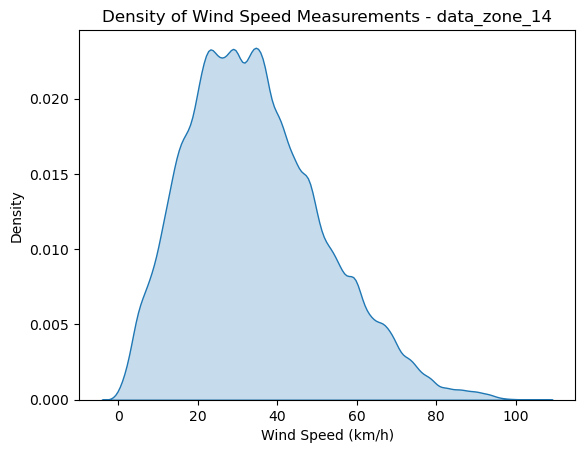

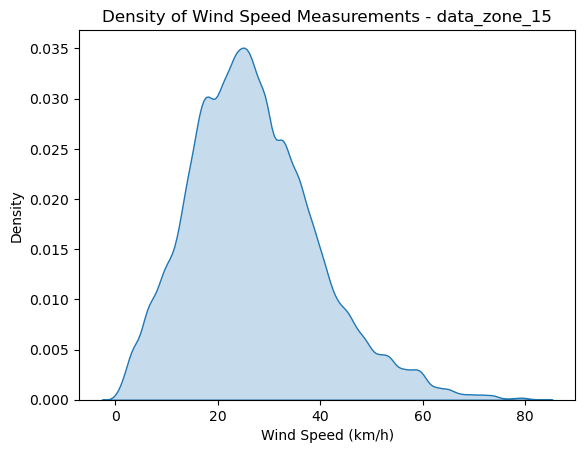

In [82]:
for zone, df in zones.items():
    # Plotting the density for the current zone
    sns.kdeplot(df['wind_speed_100m'], bw_adjust=0.5, fill=True)
    
    # Adding titles and labels with current zone information
    plt.title(f'Density of Wind Speed Measurements - {zone}')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Density')
    
    # Show the plot
    plt.show()

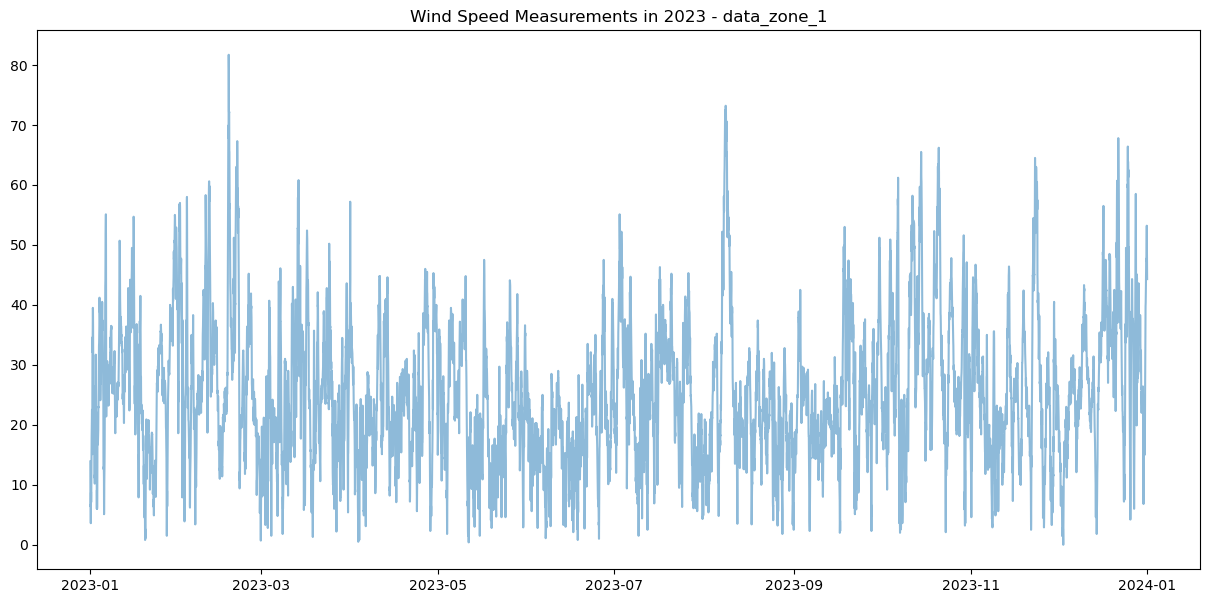

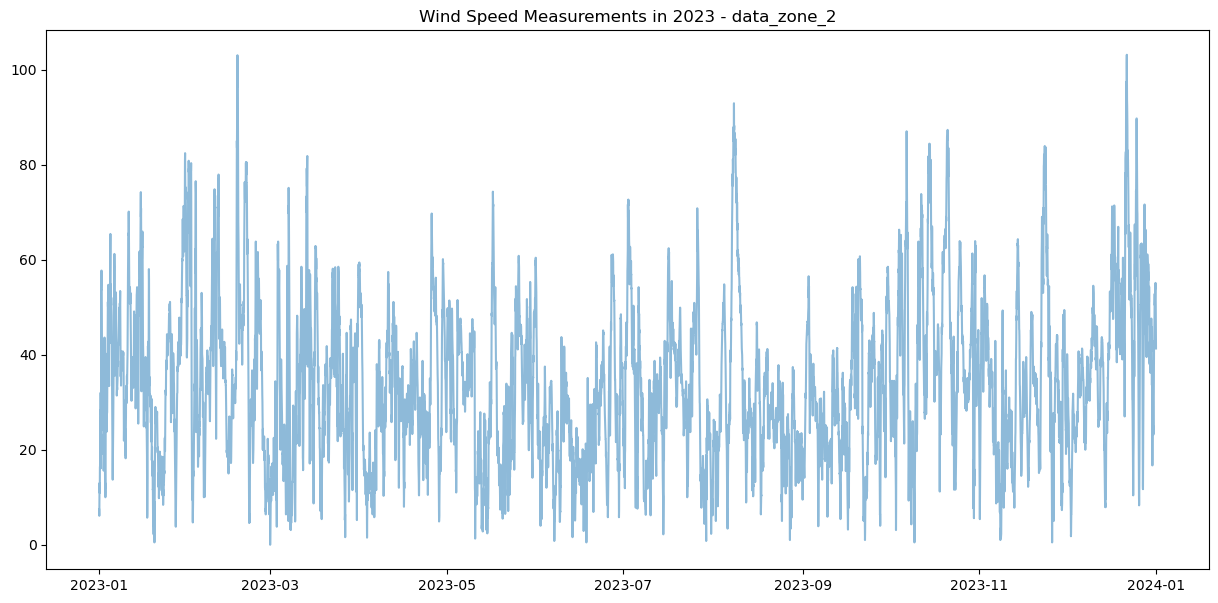

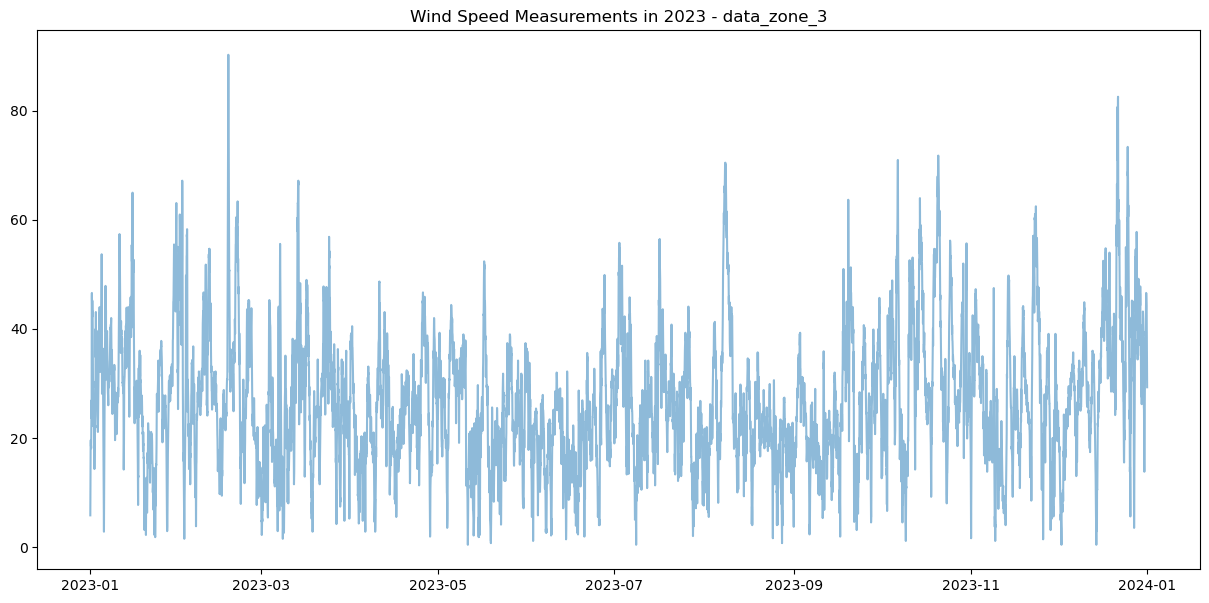

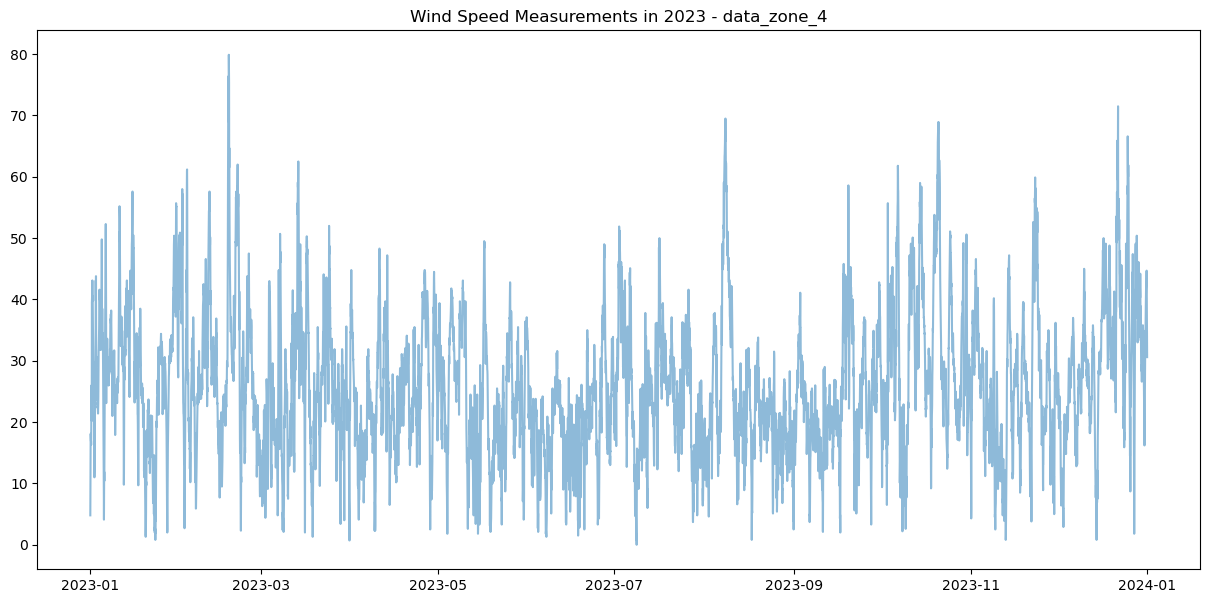

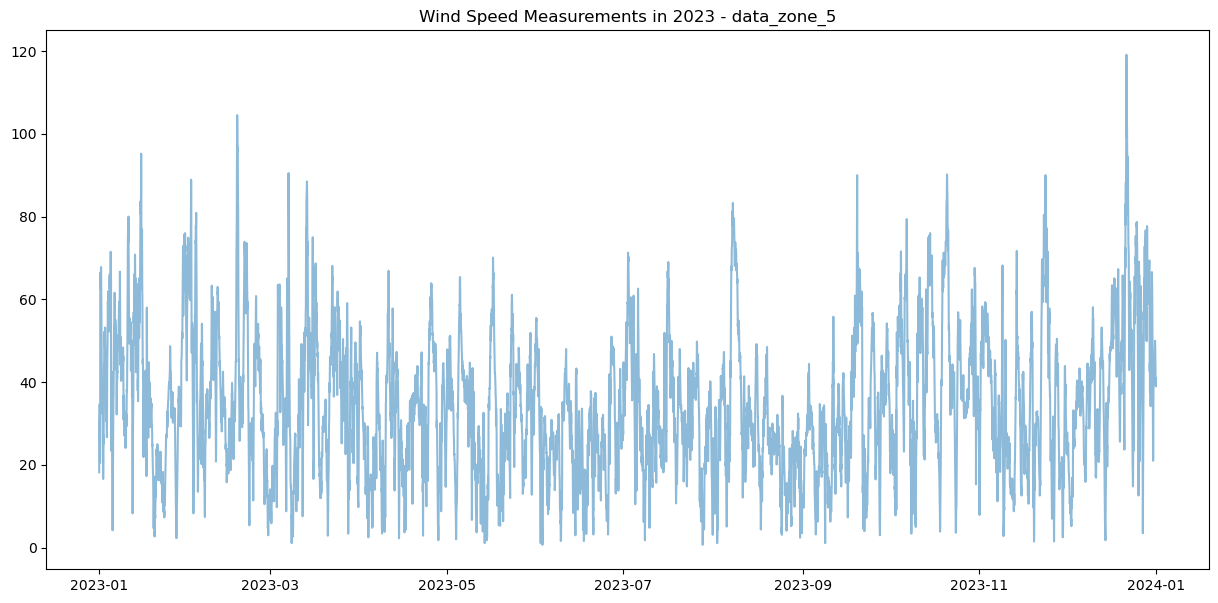

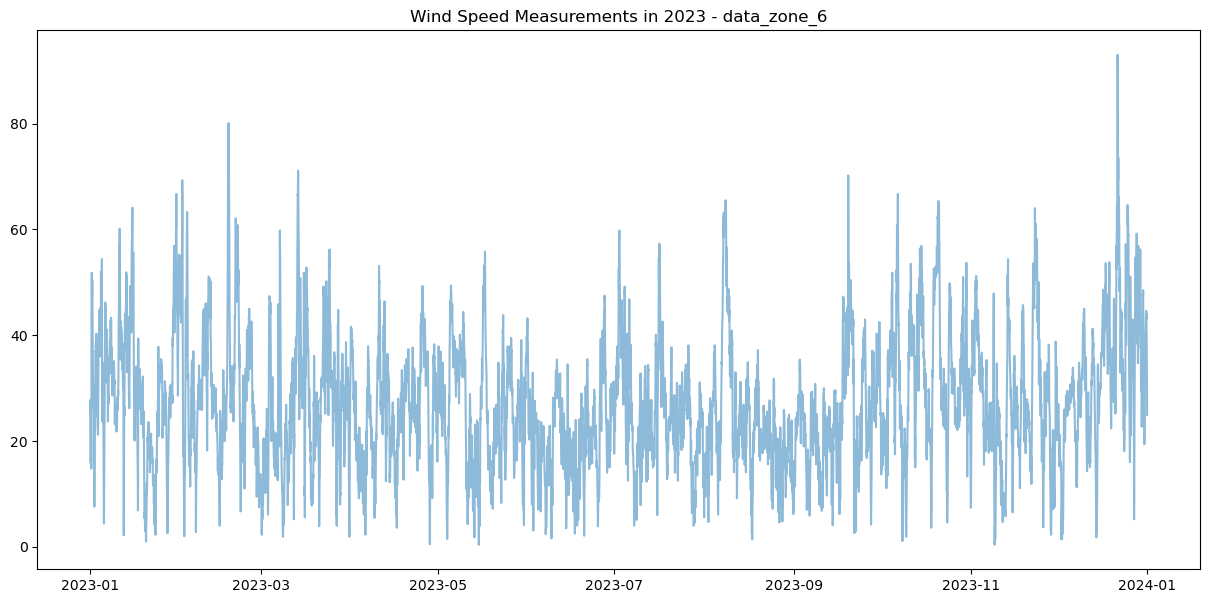

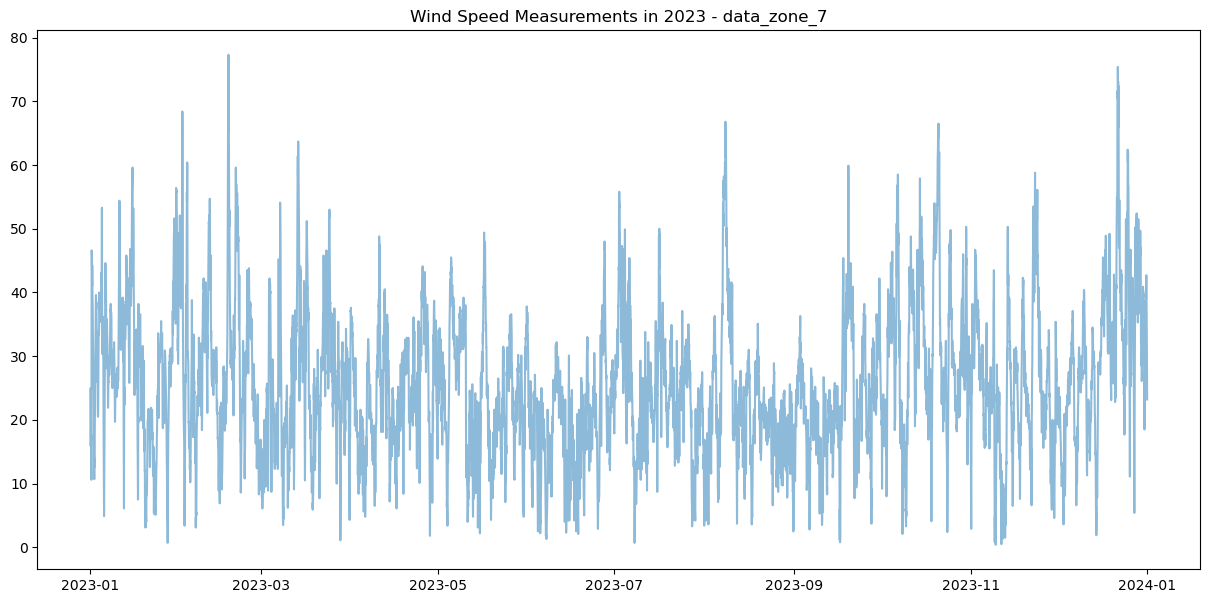

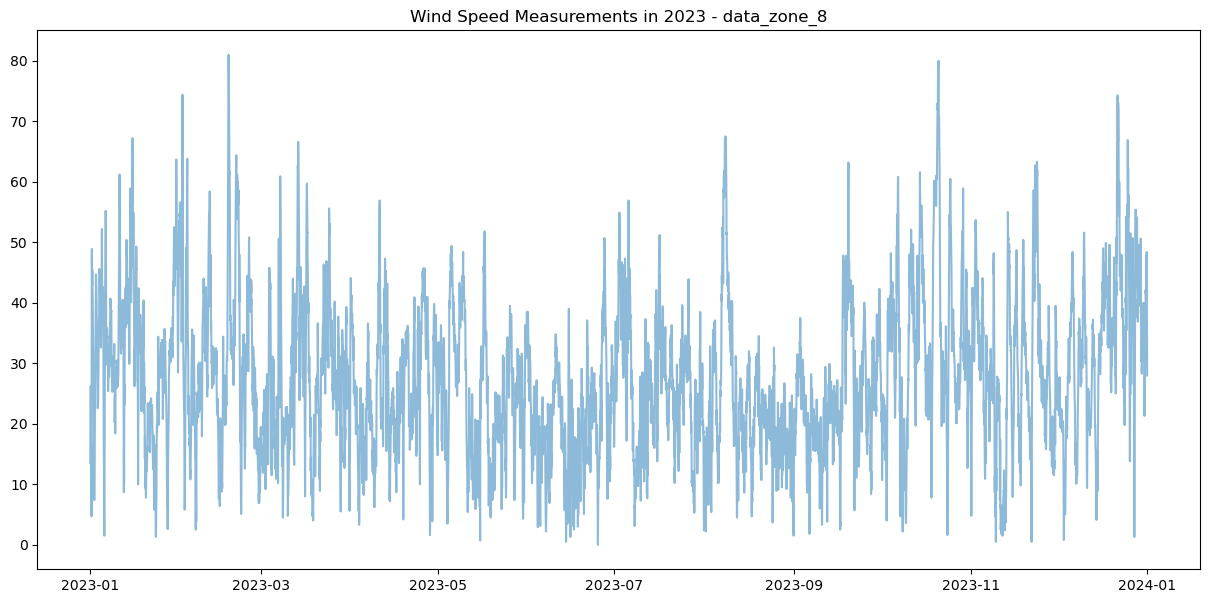

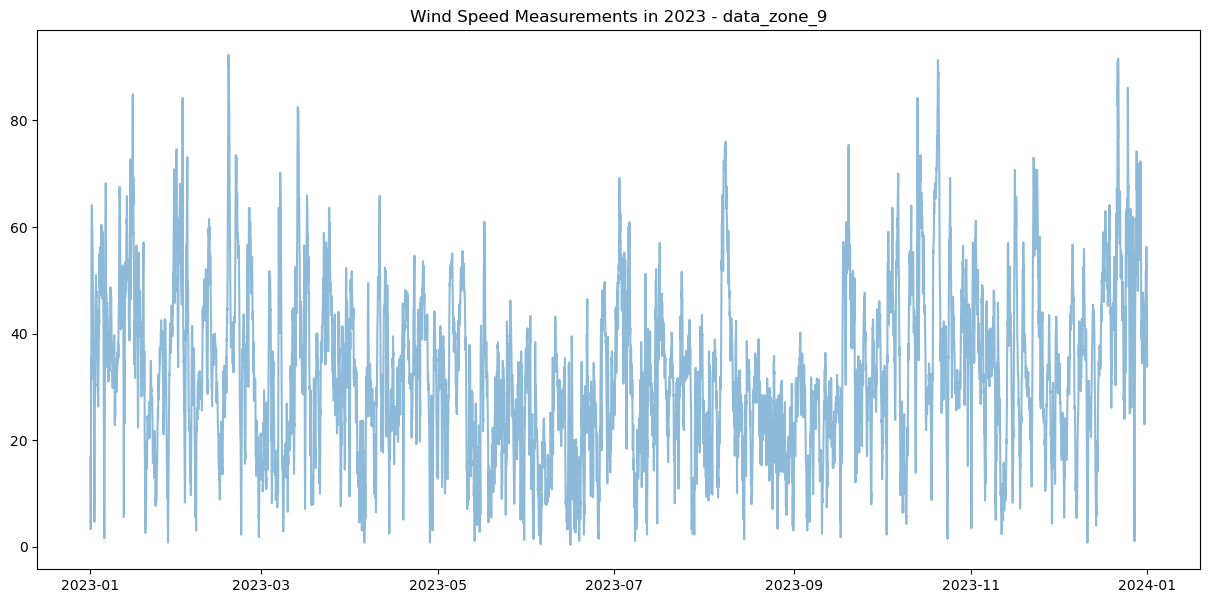

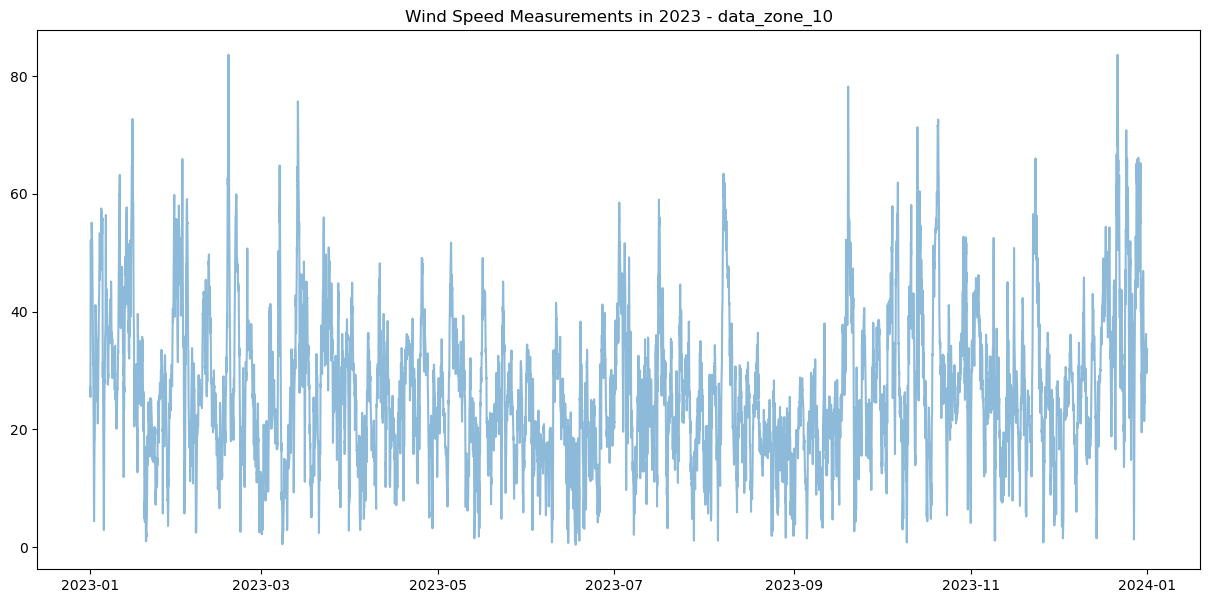

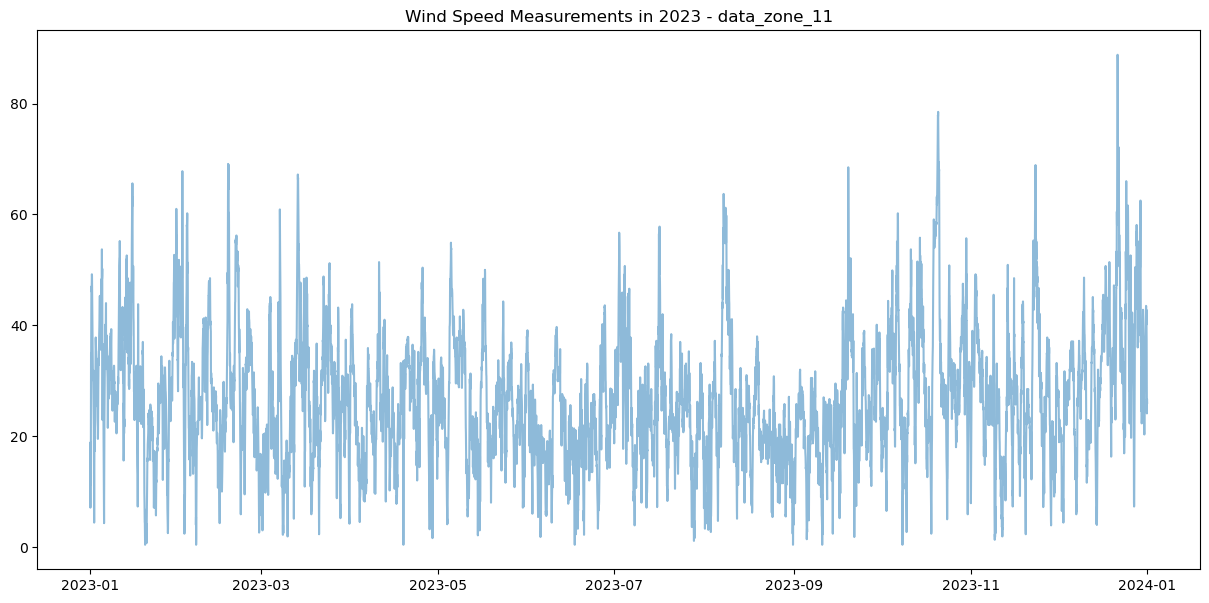

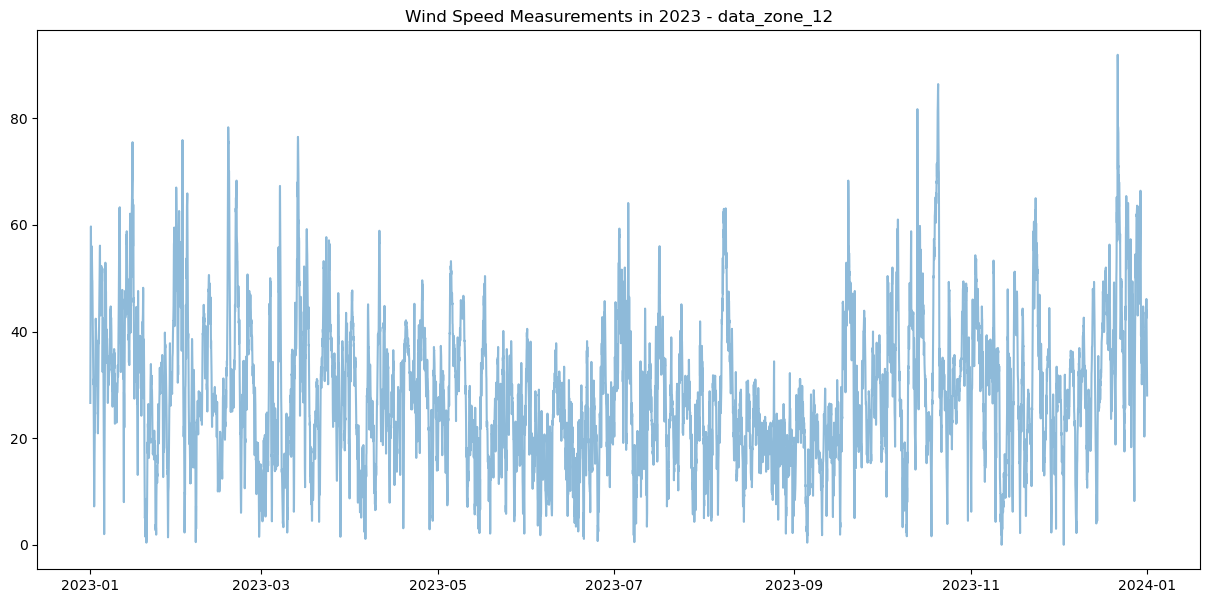

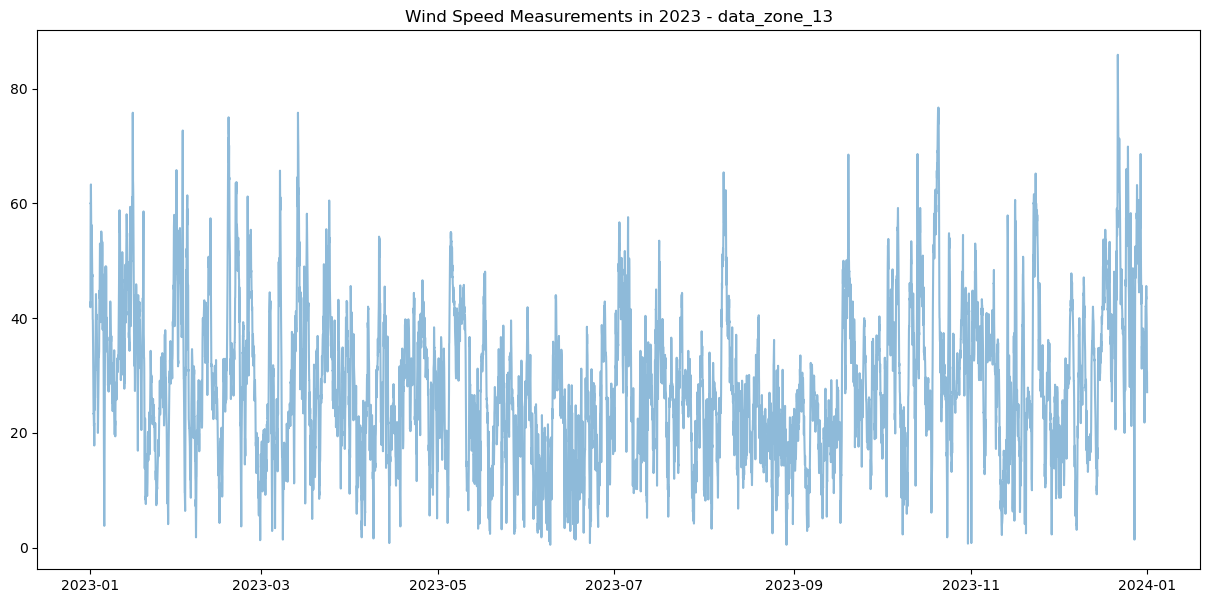

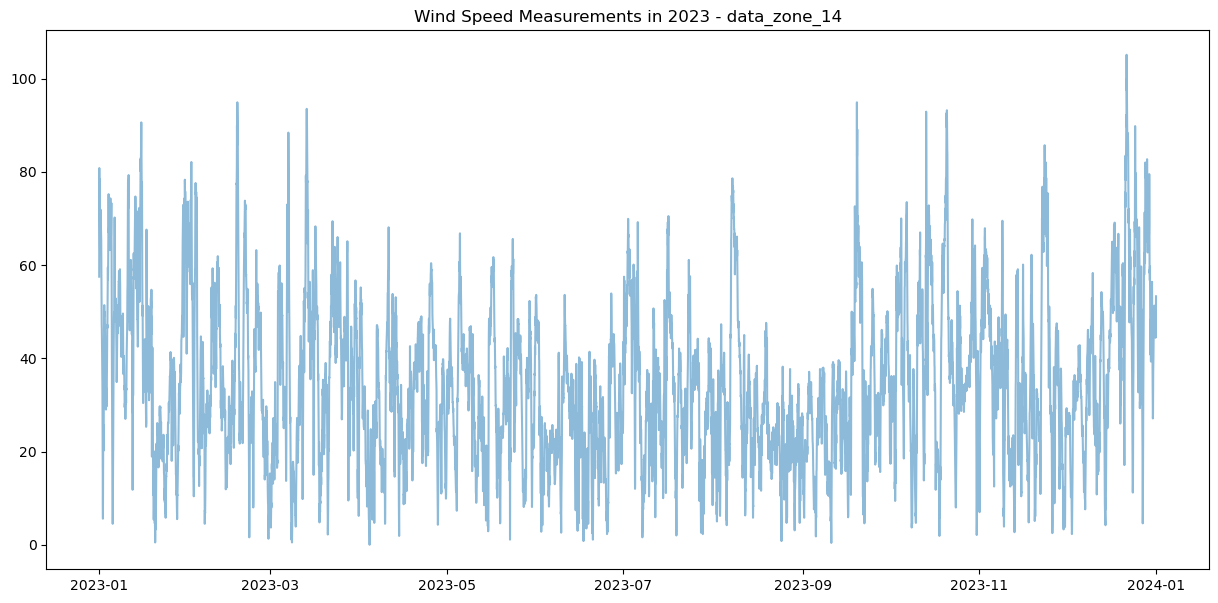

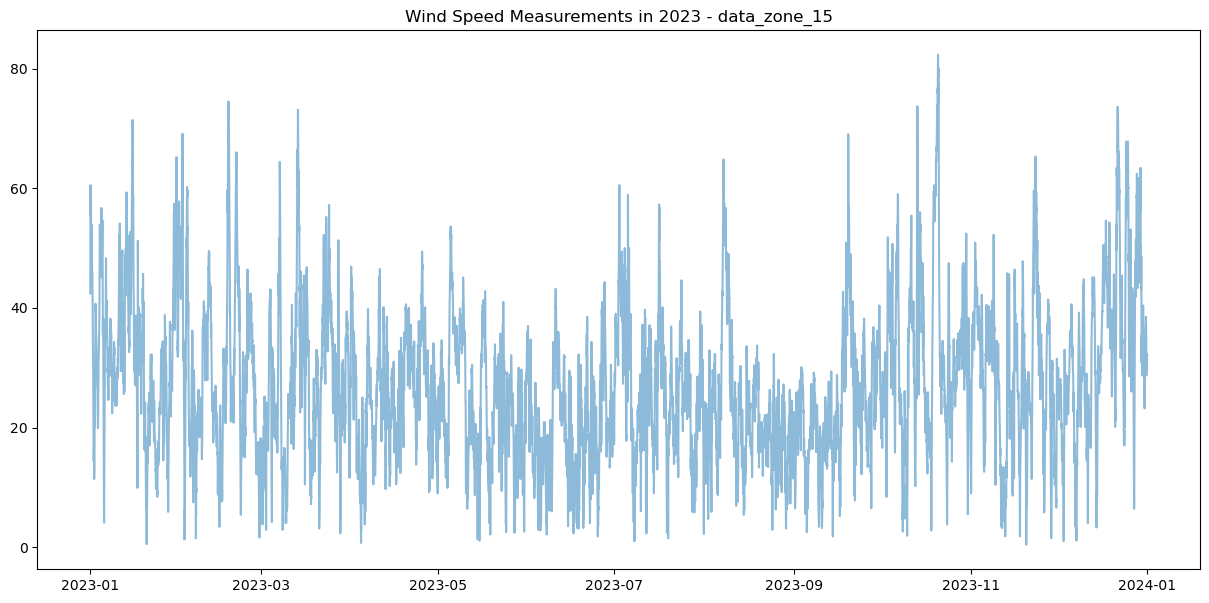

In [84]:
for zone, df in zones.items():

    plt.figure(figsize=(15, 7))  # Adjust the figure size as needed
    plt.title(f'Wind Speed Measurements in 2023 - {zone}')
    plt.plot(df.index, df['wind_speed_100m'], label='Raw Wind Speed Data', alpha=0.5)



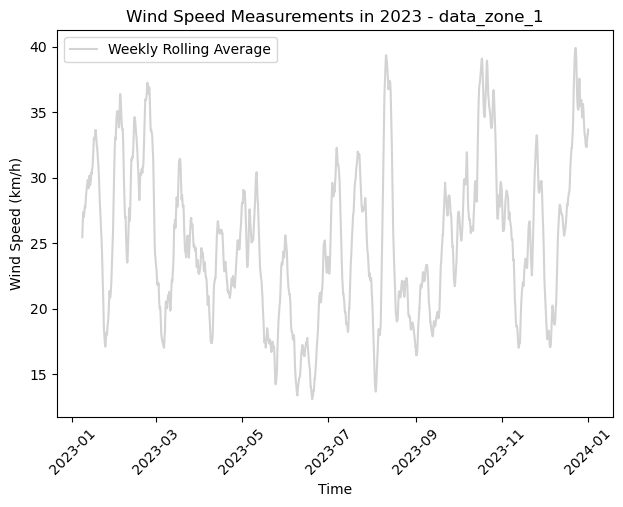

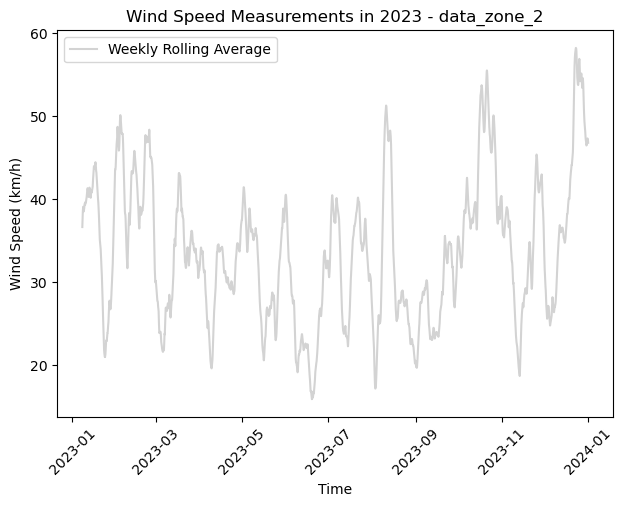

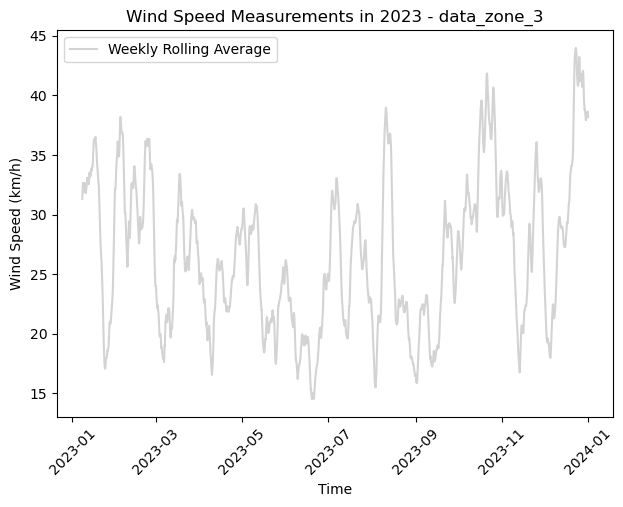

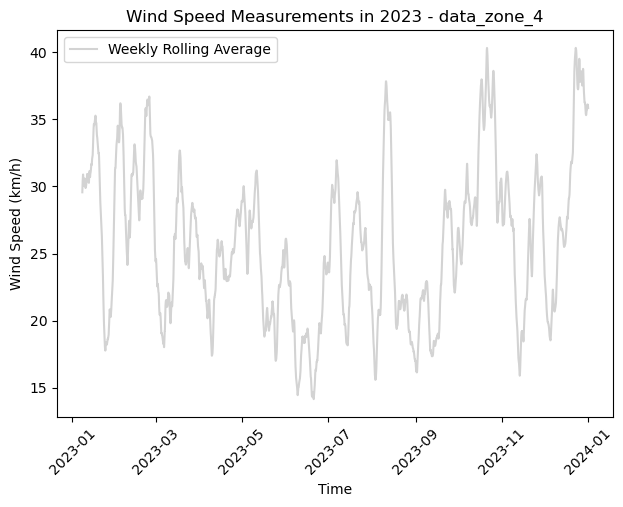

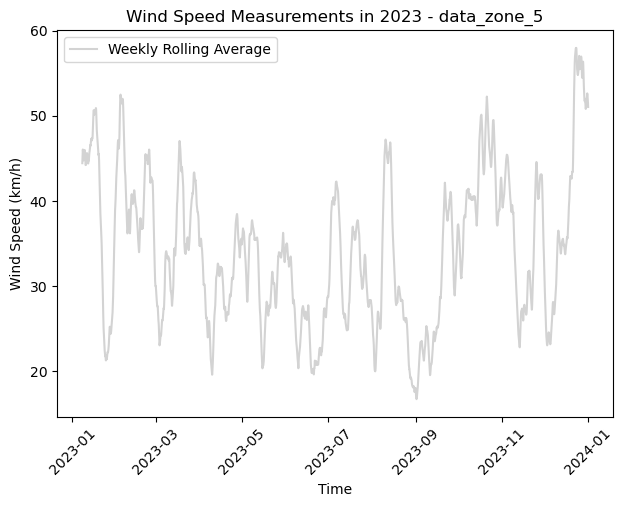

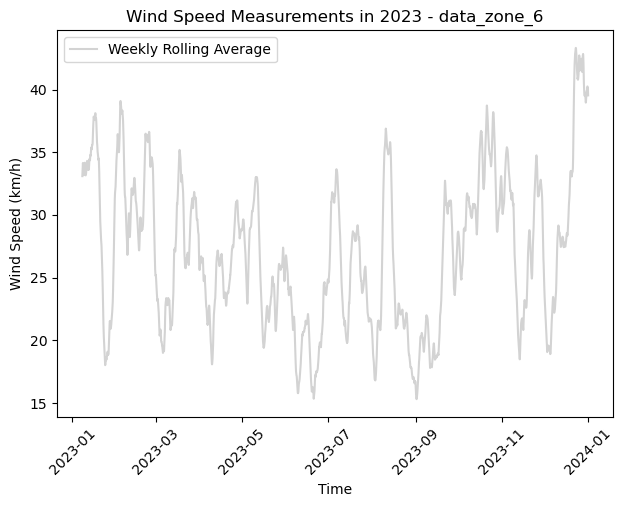

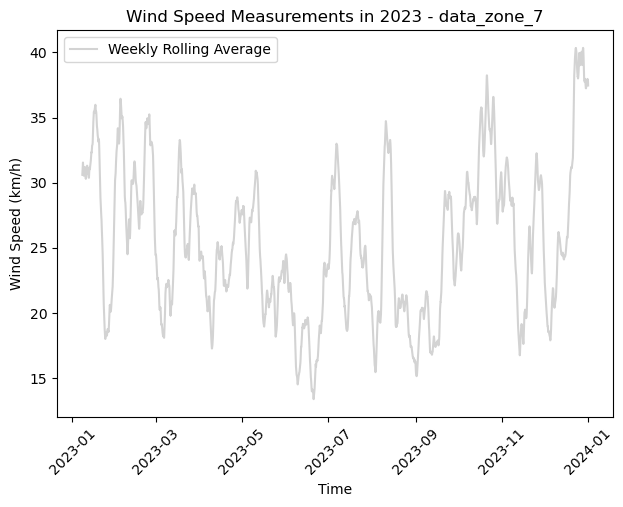

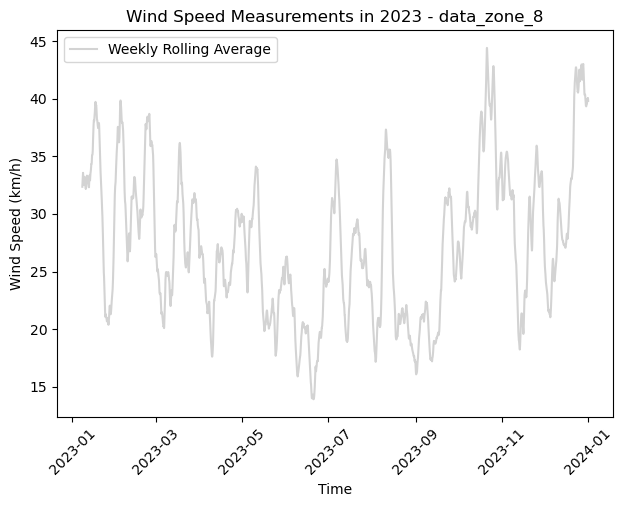

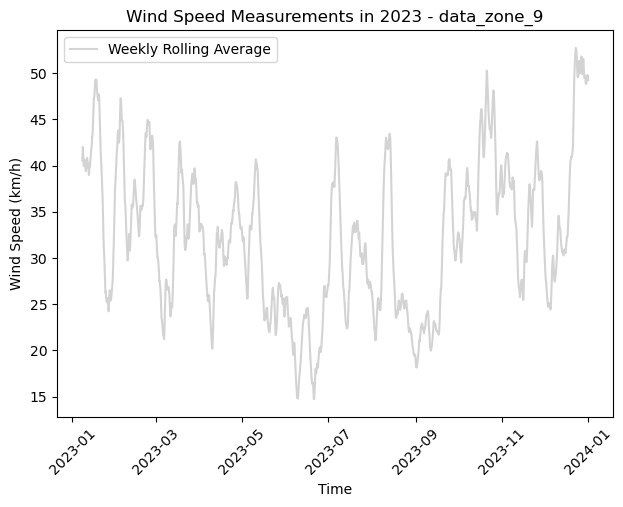

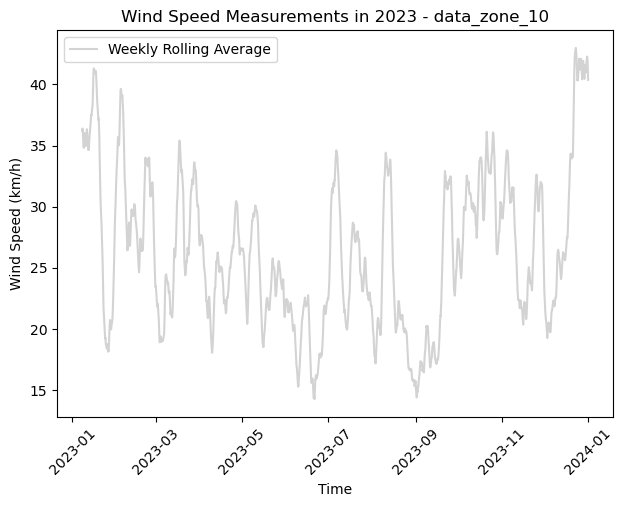

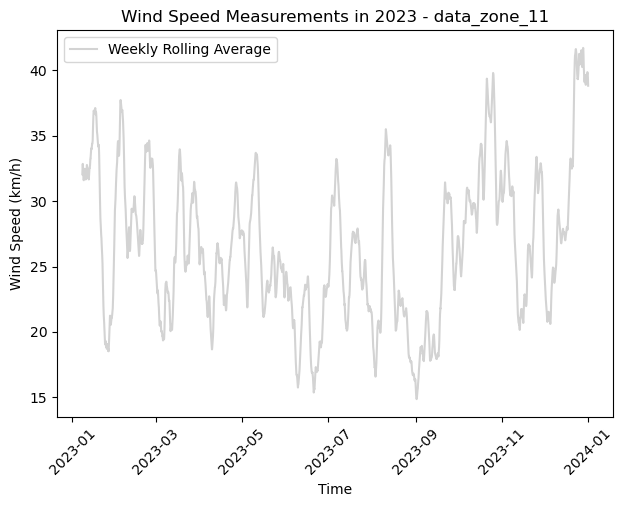

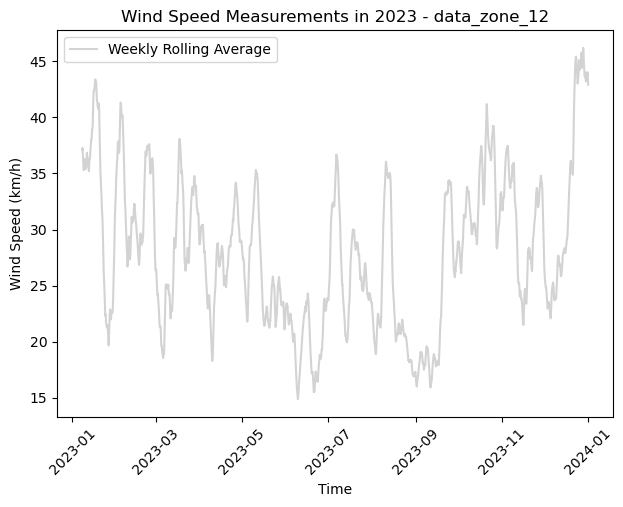

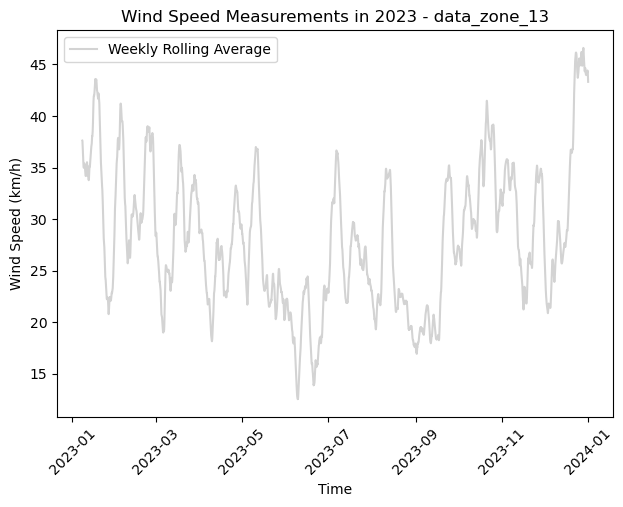

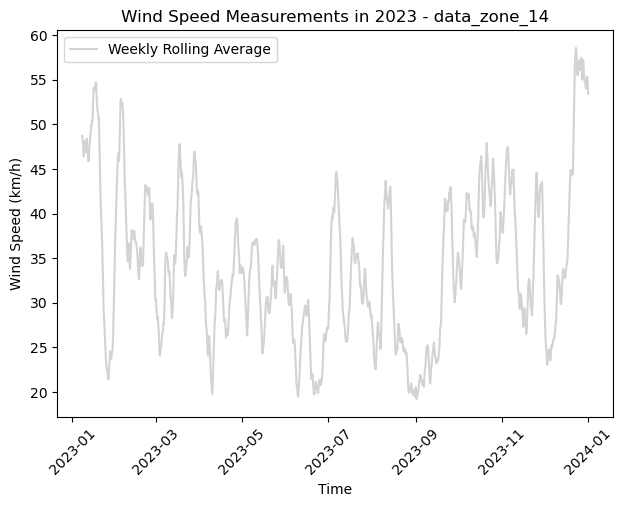

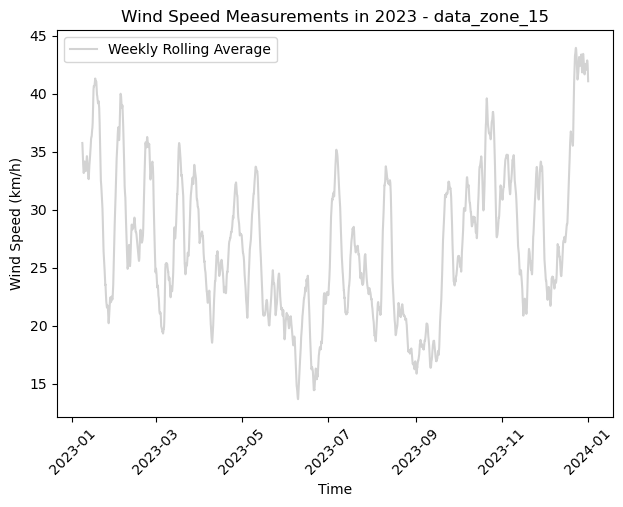

In [87]:
for zone, df in zones.items():

    # Calculating and plotting the rolling average
    rolling_avg = df['wind_speed_100m'].rolling(window=24*7).mean()  # 7-day rolling average
    plt.plot(rolling_avg, label='Weekly Rolling Average', color="lightgray")
    
    # Adding plot title and labels
    plt.title(f'Wind Speed Measurements in 2023 - {zone}')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (km/h)')
    plt.legend()
    
    # Improving the layout
    plt.tight_layout()
    
    # Rotating date labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

In [10]:
"""
# Fit the Weibull distribution to the data
shape, loc, scale = weibull_min.fit(df['wind_speed_100m (km/h)'], floc=0)

# Generate random 1-hour scenarios from the fitted Weibull distribution
num_scenarios = 100
random_scenarios = weibull_min.rvs(shape, loc, scale, size=num_scenarios)
random_scenarios
"""

array([24.08592736, 43.01226849, 20.06613726, 17.94993673, 26.18665911,
       18.25867014,  7.15536163, 14.11124243, 16.30904366,  6.82356464,
       26.94099808, 17.0829373 ,  7.32113091, 33.93645885, 23.34386586,
       30.85160773, 13.52410803, 22.62727358, 47.04679241, 44.40595121,
        8.88360034, 20.66628117, 34.82342181, 16.55493551, 12.56276758,
       37.1250754 , 36.16479473, 28.25958426, 13.13900929, 22.36715178,
       32.50620211, 19.18869495,  9.65613859, 27.90623628, 32.69603135,
       21.29379596, 13.43806776,  4.80566473, 23.74940278, 10.52658453,
       10.64519895, 42.16679042, 16.78090333, 58.34506875, 26.22028051,
        4.13426922, 13.04805339, 12.81682772, 23.74325958, 44.1519334 ,
       15.39635066, 25.15707978, 13.63619589, 18.87575761, 23.3116216 ,
       27.26961807, 26.29937386, 19.71015454, 16.13565938, 35.51011979,
       21.41405495, 25.67682482, 30.06205045, 12.56507037, 36.2936569 ,
       39.20998564, 45.19156151, 21.6115383 , 17.12609399, 42.64

## ARIMA

In [142]:
## Grid Search
"""

p = d = q = range(0, 3)  
pdq_combinations = list(product(p, d, q))
best_aic = np.inf
best_params = None
best_model = None

for combination in pdq_combinations:
    try:
        model = ARIMA(zones["data_zone_1"]["wind_speed_100m"], order=combination)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = combination
            best_model = model_fit
    except Exception as e:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best parameters: {best_params}")

"""

'\n\np = d = q = range(0, 3)  \npdq_combinations = list(product(p, d, q))\nbest_aic = np.inf\nbest_params = None\nbest_model = None\n\nfor combination in pdq_combinations:\n    try:\n        model = ARIMA(zones["data_zone_1"]["wind_speed_100m"], order=combination)\n        model_fit = model.fit()\n        if model_fit.aic < best_aic:\n            best_aic = model_fit.aic\n            best_params = combination\n            best_model = model_fit\n    except Exception as e:\n        continue\n\nprint(f"Best AIC: {best_aic}")\nprint(f"Best parameters: {best_params}")\n\n'

In [88]:
# Initialize dictionaries to store phi and theta values
phi_values = {}
theta_values = {}

p = 1
d = 0
q = 1

for zone, df in zones.items():
    # Fit the ARIMA model
    model = ARIMA(df['wind_speed_100m'], order=(p, d, q))
    model_fit = model.fit()
    
    # Initialize phi and theta arrays for this zone
    # Adjust the size of phi and theta arrays according to your p and q
    phi = [None] * p
    theta = [None] * q
    
    # Extract the estimated parameters for phi
    for i in range(p):
        param_name = f'ar.L{i+1}'
        if param_name in model_fit.params:
            phi[i] = model_fit.params[param_name]
    
    # Extract the estimated parameters for theta
    for i in range(q):
        param_name = f'ma.L{i+1}'
        if param_name in model_fit.params:
            theta[i] = model_fit.params[param_name]
    
    # Store the parameters
    phi_values[zone] = phi
    theta_values[zone] = theta
    
    # Optionally, print the summary of the model for each zone
    """
    print(f"Model Summary for {zone}:")
    print(model_fit.summary())
    print("\n")
    """

# phi_values and theta_values now contain the phi and theta parameters for each zone


In [108]:
phi_values["data_zone_14"]

[0.9671737466986943]

## Generate Scenarios

In [110]:
# Initialize a dictionary to store the scenarios for each zone
all_scenarios = {}

sigma = 5  # Standard deviation of the error terms
num_scenarios = 200
num_hours = 24

# Assuming 'zones' is a dictionary with your zone dataframes
for zone, df in zones.items():
    # Fit the ARIMA model
    model = ARIMA(df['wind_speed_100m'], order=(1, 0, 1))
    model_fit = model.fit()
    
    # Extract the AR and MA parameters
    phi = [model_fit.params['ar.L1']]
    theta = [model_fit.params['ma.L1']]
    
    # Fit the Weibull distribution to the wind speed data
    shape, loc, scale = weibull_min.fit(df['wind_speed_100m'], floc=0)
    
    # Initialize the scenarios container for the current zone
    scenarios = np.zeros((num_scenarios, num_hours))
    
    # Generate scenarios
    np.random.seed(40)  # For reproducibility
    for scenario in range(num_scenarios):
        errors = np.random.normal(0, sigma, num_hours)  # Generate random errors
        y = np.zeros(num_hours)  # Placeholder for the scenario values
        x1 = weibull_min.rvs(shape, loc, scale, size=1)
        y[0] = x1
        for t in range(1, num_hours):
            # Generate the scenario based on the ARIMA(1,0,1) model
            y[t] = phi[0] * y[t-1] + errors[t] + theta[0] * errors[t-1]
            # Apply corrections for out-of-bound values
            if y[t] < 0:
                y[t] = 5
            elif y[t] > 100:
                y[t] = 95
        
        scenarios[scenario, :] = y
    
    # Store the generated scenarios for the current zone
    all_scenarios[zone] = scenarios

# `all_scenarios` now contains the generated wind speed scenarios for each zone


In [113]:
all_scenarios["data_zone_1"][0]

array([28.36343199, 26.11177691, 21.546548  , 24.77844502, 15.31988414,
       10.88391831, 21.53534269, 24.97423169, 27.92568314, 32.66487037,
       32.48699146, 32.5262264 , 34.38031412, 37.91231967, 32.03236215,
       29.26583703, 25.80095211, 26.88615934, 25.21880659, 17.67837083,
       17.41112851, 17.49944644, 17.04898122, 22.75861573])

In [114]:
## ARMA (2,2)

"""
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming we have the ARIMA model parameters as follows:
# For an ARMA(2,2) model, let's define some example coefficients
# These should be replaced with the actual fitted model's coefficients
#phi = [0.5, 0.2]  # AR coefficients for ARMA(2,2)
#theta = [-0.5, -0.4]  # MA coefficients for ARMA(2,2)
sigma = 0.3  # Standard deviation of the error terms

shape, loc, scale = weibull_min.fit(df['wind_speed_100m (km/h)'], floc=0)

# Assuming `model_fitted` is your pre-fitted ARIMA model, loaded or accessed somehow
# model_fitted = ARIMAResults.load('your_model_file.pkl')


# Number of scenarios and hours
num_scenarios = 10000
num_hours = 24

# Initialize the scenarios container
scenarios = np.zeros((num_scenarios, num_hours))

# Generate scenarios
np.random.seed(40)  # For reproducibility
for scenario in range(num_scenarios):
    errors = np.random.normal(0, sigma, num_hours)  # Generate random errors
    y = np.zeros(num_hours)  # Placeholder for the scenario values
    x1 = weibull_min.rvs(shape, loc, scale, size=1)
    y[0] = x1
    y[1] = x1 + errors[1]
    for t in range(2, num_hours):  # Start from 2 because we need past 2 values
        # Implementing the ARMA(2,2) model manually
        y[t] = phi[0] * y[t-1] + phi[1] * y[t-2] + errors[t] - theta[0] * errors[t-1] - theta[1] * errors[t-2]
    
    scenarios[scenario, :] = y

# Show the first scenario as an example
# Assuming 'scenarios' is a 2D array and you want to print the first scenario (i.e., the first row of 'scenarios')


first_scenario = scenarios[90]# This should be the correct way to access the first scenario if 'scenarios' is a 2D array
for num in first_scenario:
    print(f"{num:.4f}")
"""

'\nimport numpy as np\nimport pandas as pd\nfrom statsmodels.tsa.arima.model import ARIMA\n\n# Assuming we have the ARIMA model parameters as follows:\n# For an ARMA(2,2) model, let\'s define some example coefficients\n# These should be replaced with the actual fitted model\'s coefficients\n#phi = [0.5, 0.2]  # AR coefficients for ARMA(2,2)\n#theta = [-0.5, -0.4]  # MA coefficients for ARMA(2,2)\nsigma = 0.3  # Standard deviation of the error terms\n\nshape, loc, scale = weibull_min.fit(df[\'wind_speed_100m (km/h)\'], floc=0)\n\n# Assuming `model_fitted` is your pre-fitted ARIMA model, loaded or accessed somehow\n# model_fitted = ARIMAResults.load(\'your_model_file.pkl\')\n\n\n# Number of scenarios and hours\nnum_scenarios = 10000\nnum_hours = 24\n\n# Initialize the scenarios container\nscenarios = np.zeros((num_scenarios, num_hours))\n\n# Generate scenarios\nnp.random.seed(40)  # For reproducibility\nfor scenario in range(num_scenarios):\n    errors = np.random.normal(0, sigma, num_ho

In [116]:
#scenarios

In [117]:
n_clusters = 10
zone_centroids = {}  # Dictionary to store centroids for each zone
zone_labels = {}  # Dictionary to store labels for each zone

# Loop through all scenarios for each zone in the dictionary
for zone, scenarios in all_scenarios.items():
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data for the current zone
    kmeans.fit(scenarios)
    
    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    
    # Get the labels of the clusters for each scenario
    labels = kmeans.labels_
    
    # Store the centroids and labels in their respective dictionaries
    zone_centroids[zone] = centroids
    zone_labels[zone] = labels
    
    # If you want to see the centroids and labels for each zone
    #print(f"Zone: {zone}")
    #print("Centroids:\n", centroids)
    #print("Labels:\n", labels)
    #print("\n")  # Just to add a line break between zones for clarity


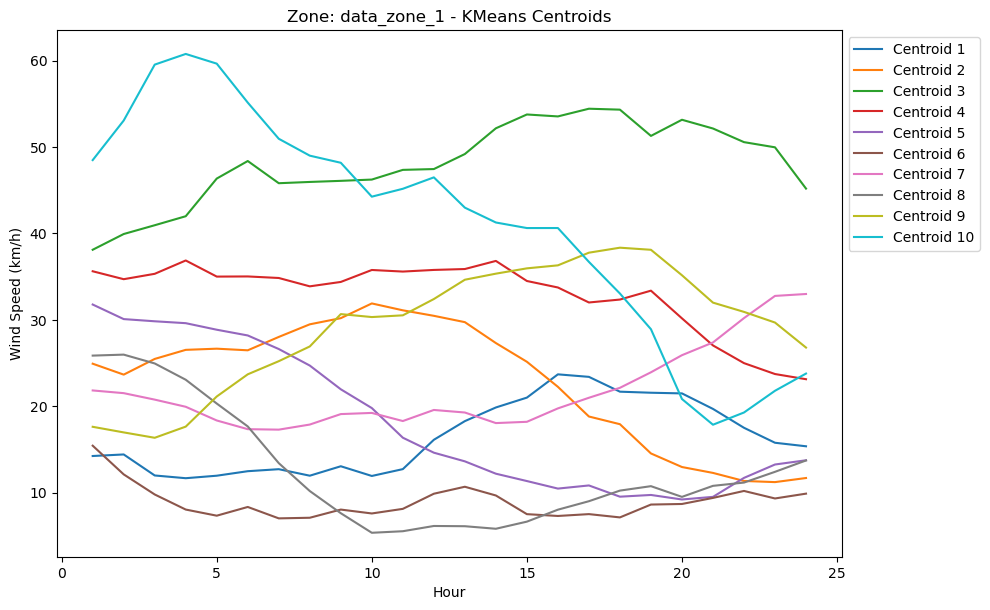

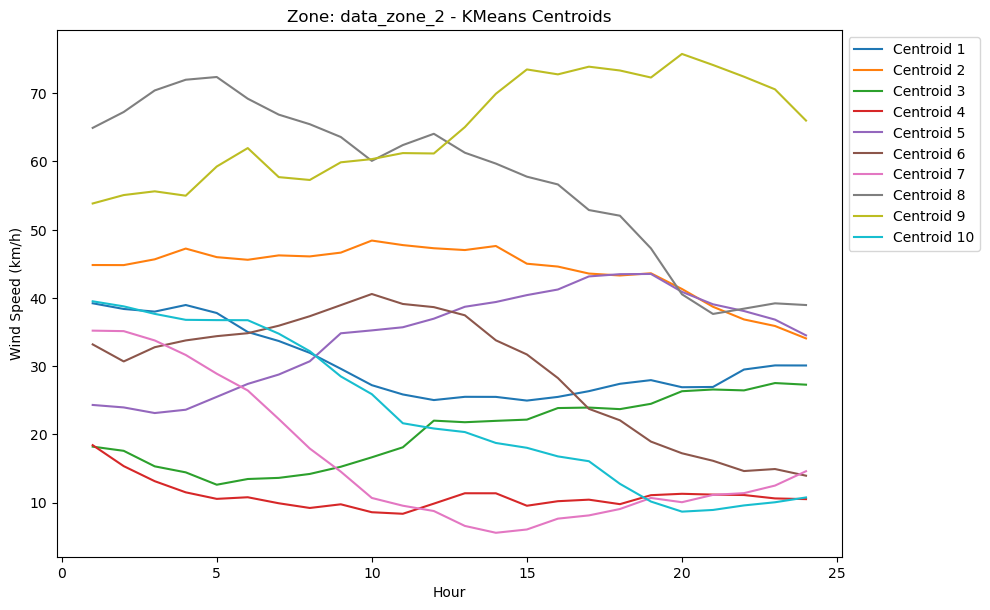

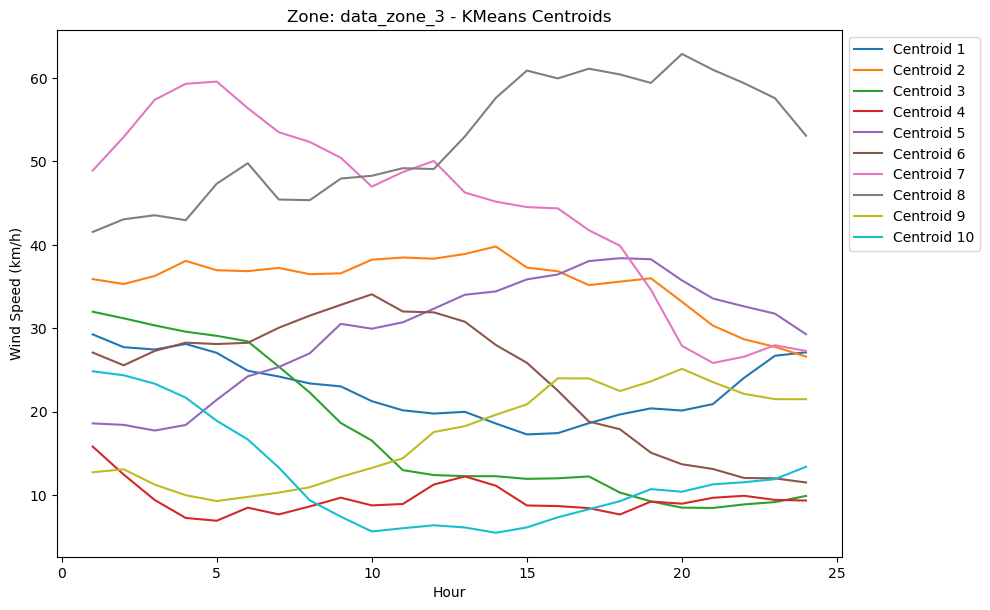

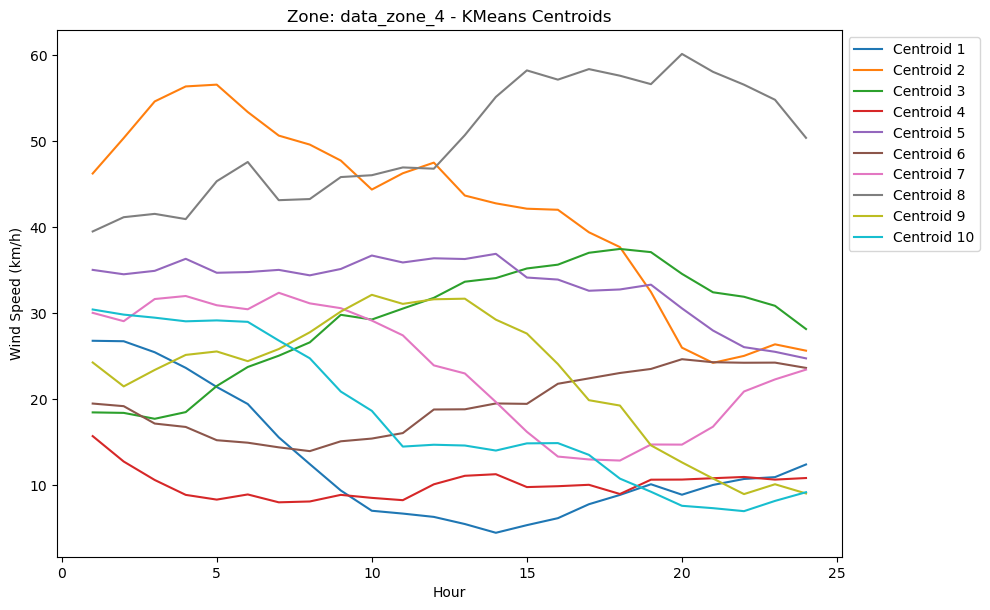

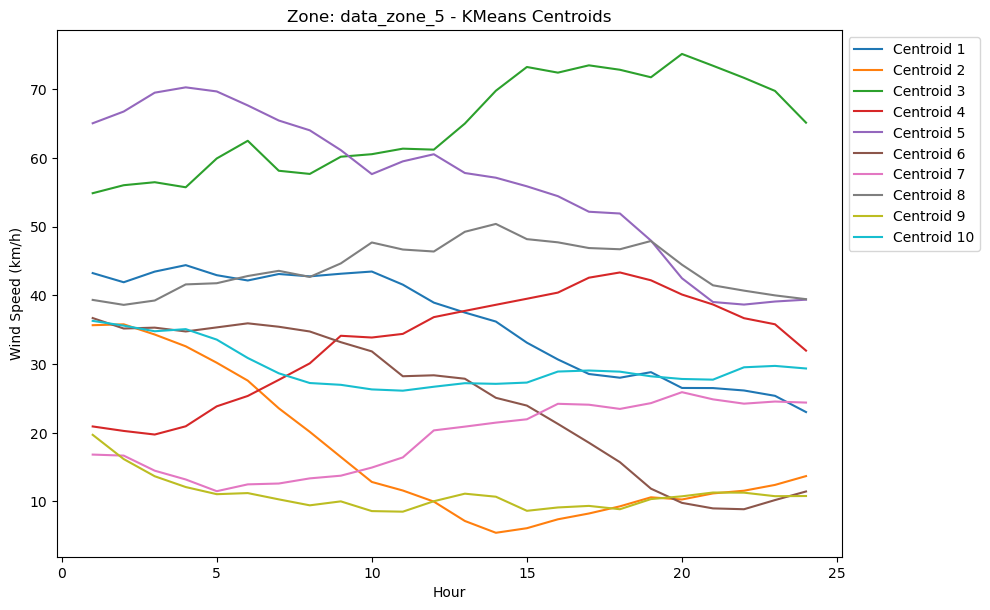

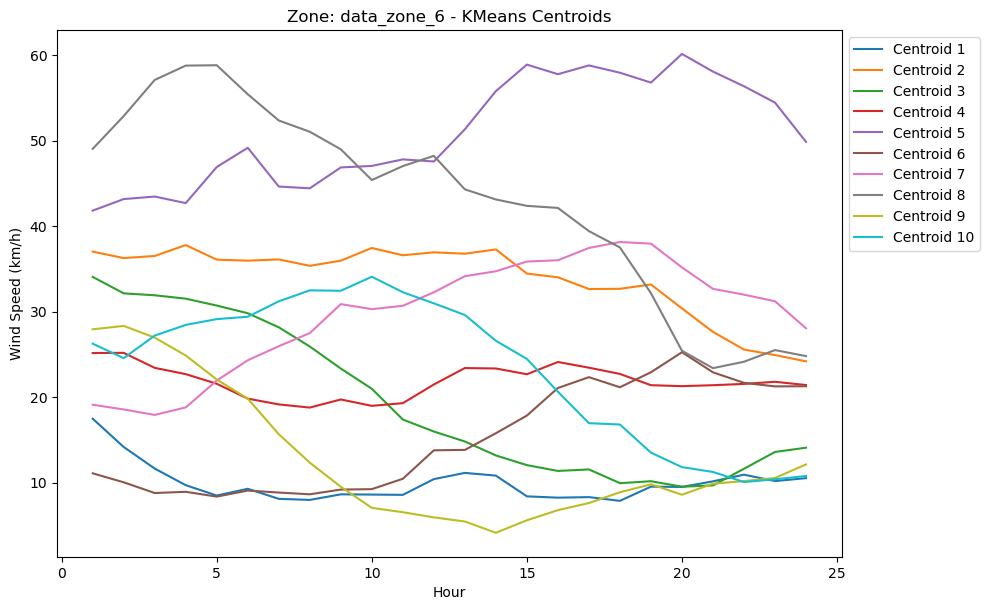

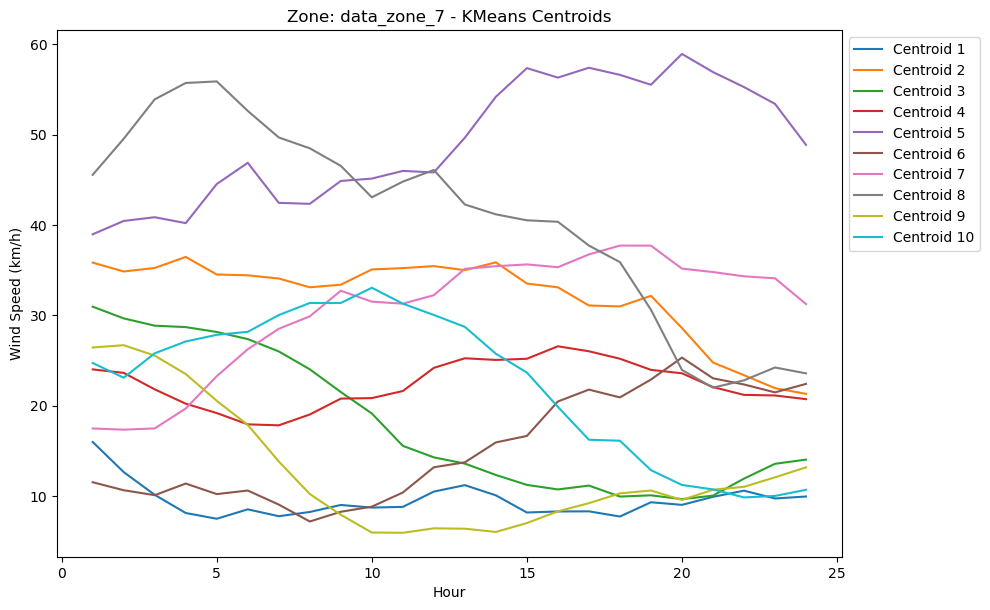

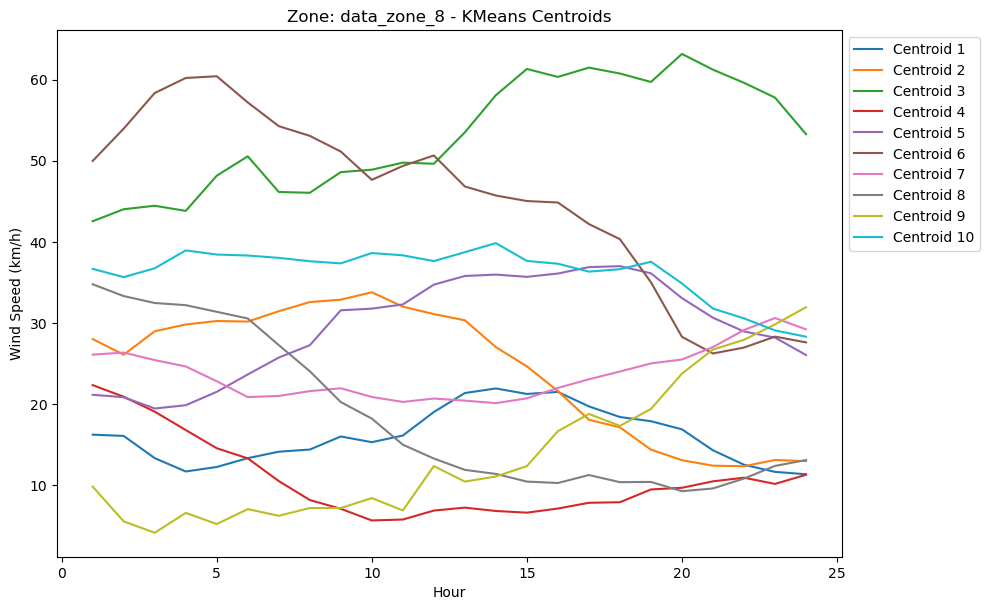

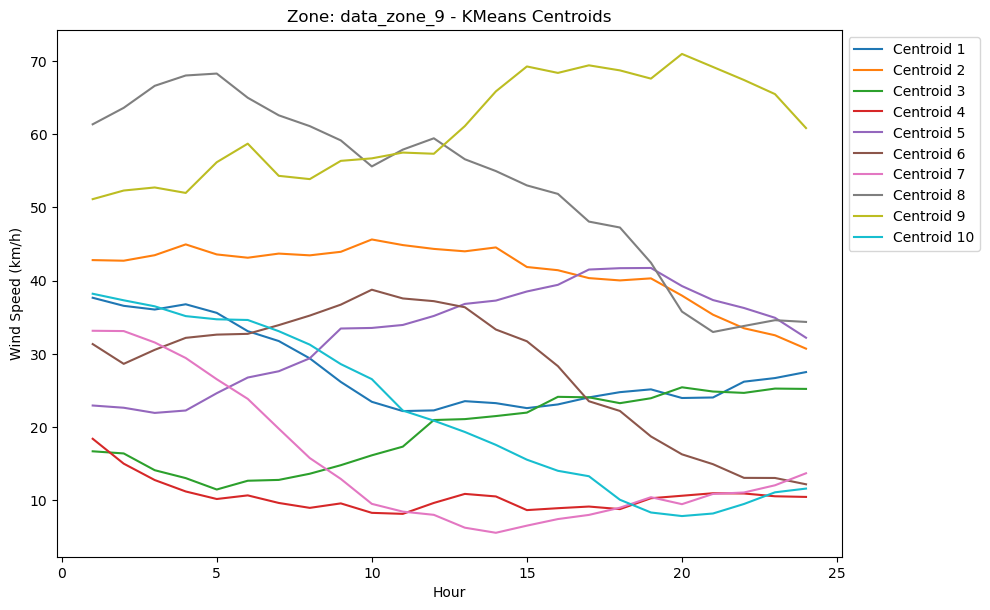

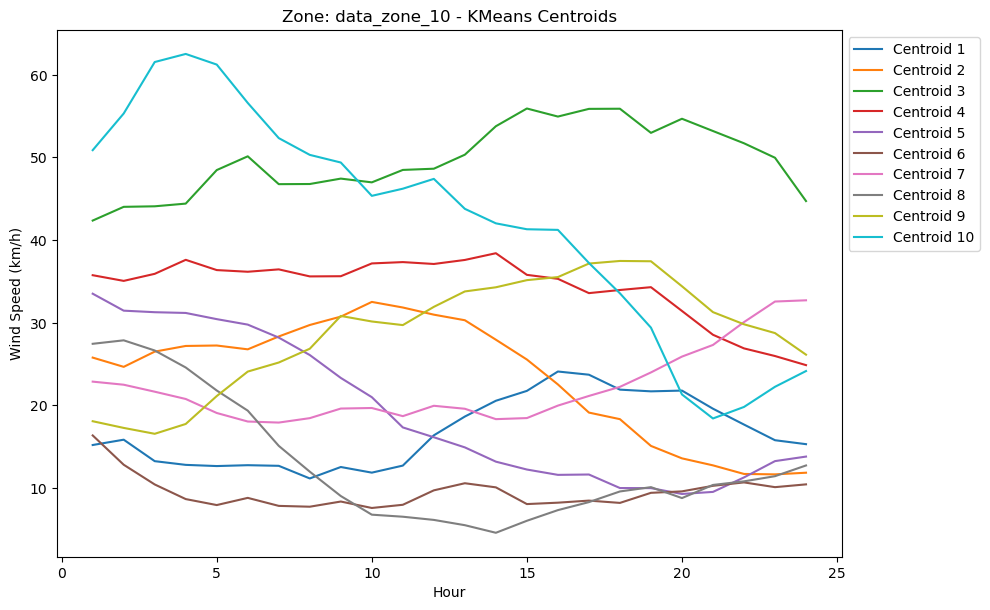

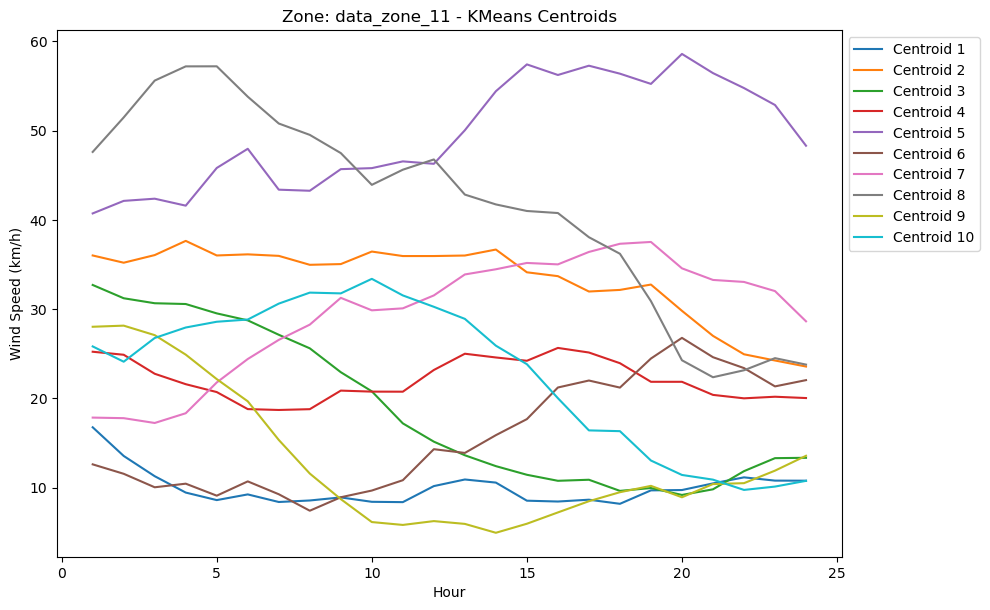

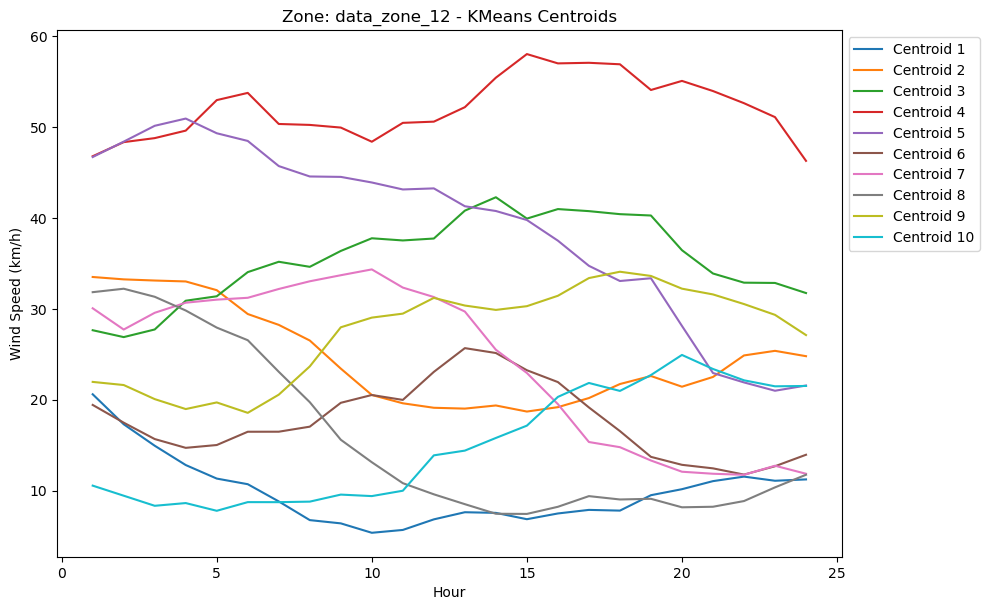

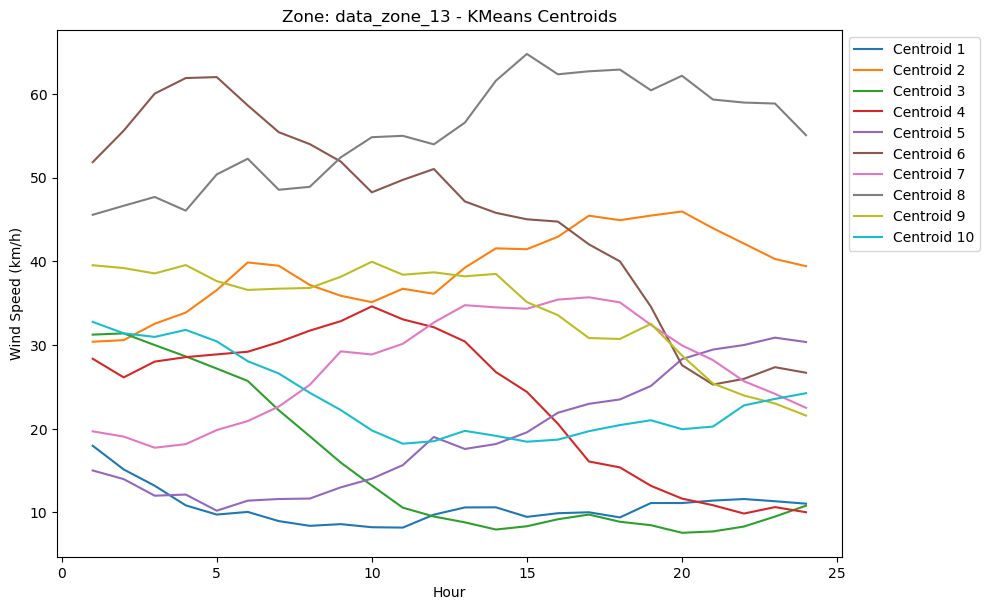

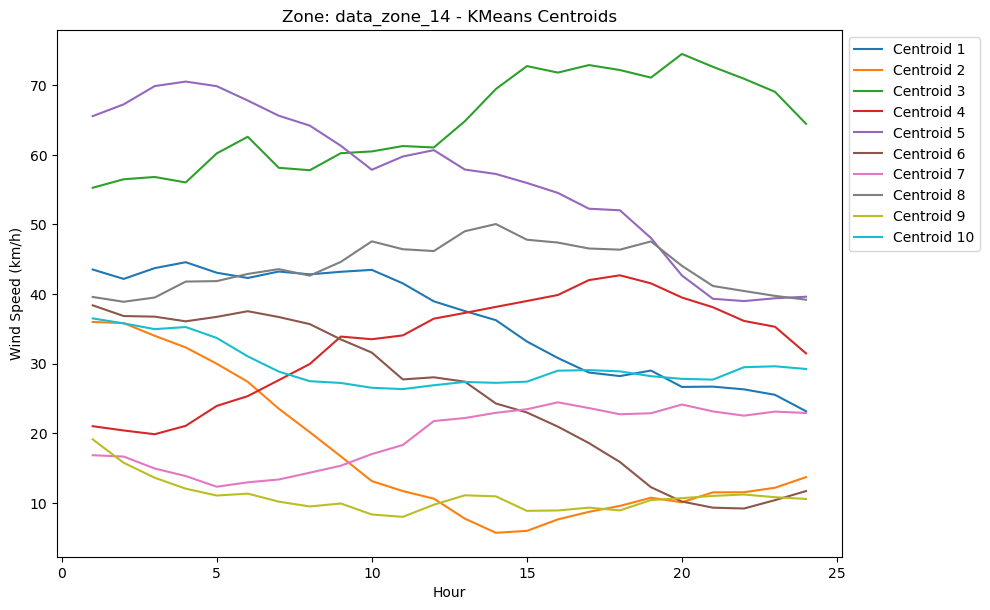

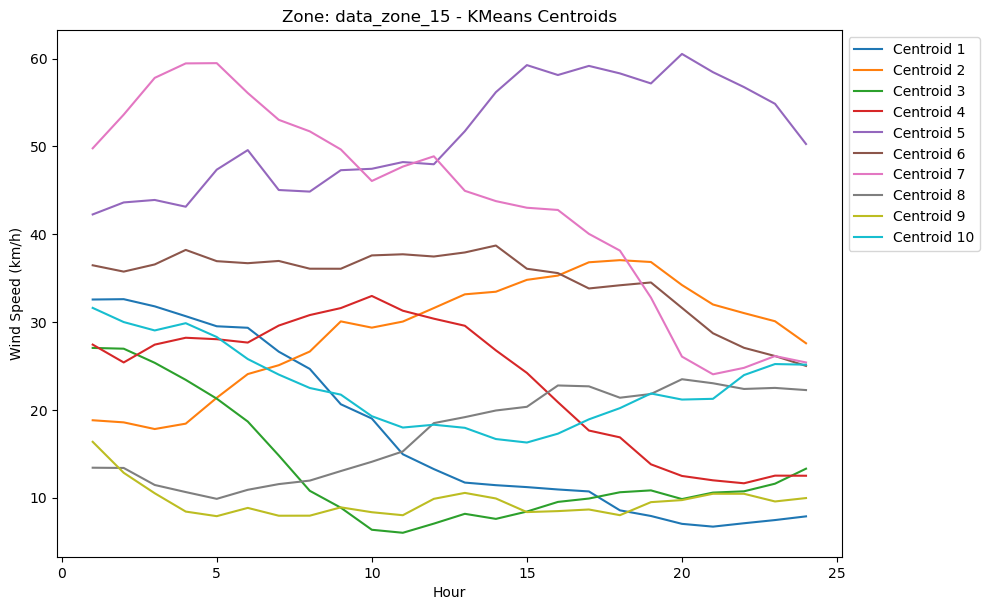

In [119]:
num_hours = 24  # Assuming this is consistent for all scenarios

# Loop through each zone to plot the centroids
for zone, centroids in zone_centroids.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each zone
    
    # Plot each centroid
    for i in range(len(centroids)):
        plt.plot(range(1, num_hours+1), centroids[i], label=f'Centroid {i+1}')
    
    # Labeling the axes
    plt.xlabel('Hour')
    plt.ylabel('Wind Speed (km/h)')
    
    # Adding a legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Title to indicate the zone
    plt.title(f'Zone: {zone} - KMeans Centroids')
    
    # Show the plot
    plt.show()


### Export to DataFrame

In [140]:
# Create an empty list to store the data
data_to_store = []
i = 0
# Iterate over each zone and its centroids
for zone, centroids in zone_centroids.items():
    i += 1
    for scenario_index, hourly_values in enumerate(centroids):
        # Ensure we only take the first 10 centroids (scenarios)
        if scenario_index >= 10:
            break
        # Divide the hourly values by 100
        hourly_values_scaled = hourly_values / 100
        # Concatenate the hourly values into a string separated by forward slashes
        energy_string = ';'.join(map(str, hourly_values_scaled))
        # Create a row for the CSV
        row = {
            'Node': i,
            'Q': i,
            'Omega': scenario_index + 1,
            'Energy': energy_string
        }
        data_to_store.append(row)

# Convert the list of dictionaries to a DataFrame
df_to_store = pd.DataFrame(data_to_store)

# Export the DataFrame to a CSV file
csv_file_path = "data\\15_zones_scenarios.csv"  # Path where you want to store the CSV file
df_to_store.to_csv(csv_file_path, index=False)

# Output the path to the CSV file
print(f"Scenarios saved to CSV file at: {csv_file_path}")


Scenarios saved to CSV file at: data\15_zones_scenarios.csv


In [141]:
df_new = pd.read_csv("data/15_zones_scenarios.csv")
df_new

Node   Q  Omega                                             Energy
0       1   1      1  0.1424043634282774;0.144210969386013;0.1198808...
1       1   1      2  0.24925152559364394;0.23660657293347845;0.2547...
2       1   1      3  0.38113445680697255;0.39934607673258554;0.4095...
3       1   1      4  0.3562393871699561;0.34706232693889427;0.35329...
4       1   1      5  0.3177469258584971;0.3008752289768007;0.298349...
..    ...  ..    ...                                                ...
145    15  15      6  0.3645327101394602;0.3573306728325736;0.365493...
146    15  15      7  0.49774970256957457;0.5360920436261373;0.57796...
147    15  15      8  0.13399841378948696;0.1337183542158214;0.11434...
148    15  15      9  0.1634935677336012;0.12821155953712204;0.10491...
149    15  15     10  0.3160047991421996;0.29987026032066844;0.29032...

[150 rows x 4 columns]